In [ ]:
#IMPORTING LIBRARIES FOR HANDLING DATAFRAME
import pandas as pd
import numpy as np

In [ ]:
#INSTALLING MXLTEND TO USE THE MODELS
pip install mlxtend

In [ ]:
#READING THE CSV FILE
groceries_df = pd.read_csv(r"D:\MARKET BASKET ANALYSIS\Groceries_dataset.csv")

In [ ]:
#DISPLAY THE FIRST 5 ROWS OF THE DF
groceries_df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
#CHECKING THE NULL VALUE
groceries_df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
#CHECKING THE DUPLICATE VALUES
groceries_df.duplicated().sum()

759

In [ ]:
#COUNTING THE ROW OF ALL COLUMNS
groceries_df.count()

Member_number      38765
Date               38765
itemDescription    38765
dtype: int64

In [ ]:
#CHECK THE UNIQUE VALUES IN THE ITEM
groceries_df['itemDescription'].nunique()

167

In [ ]:
#CHECK THE UNIQUE VALUES IN THE MEMBER NUMBER
groceries_df['Member_number'].nunique()

3898

In [ ]:
#DROPING THE DUPLICATE VALUES
groceries_df.drop_duplicates(inplace=True)

In [ ]:
#CONVERT THE DATE COLUMNS IN CORRECT FORMAT
groceries_df["Date"] = pd.to_datetime(groceries_df["Date"], format="%d-%m-%Y")

In [ ]:
#CREATE TWO NEW COLUMNS 
groceries_df["Day"] = groceries_df["Date"].dt.day
groceries_df["Month"] = groceries_df["Date"].dt.month

In [ ]:
#DISPLAY THE HEAD AFTER CLEANING
groceries_df.head()

,Member_number,Date,itemDescription,Day,Month
0,1808,2015-07-21,tropical fruit,21,7
1,2552,2015-01-05,whole milk,5,1
2,2300,2015-09-19,pip fruit,19,9
3,1187,2015-12-12,other vegetables,12,12
4,3037,2015-02-01,whole milk,1,2


In [ ]:
#IMPORTING THE DATA VISUALIZATION LIB FOR EDA
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

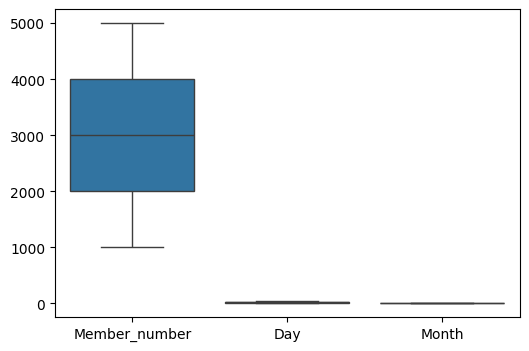

In [ ]:
#CHECKING THE OUTLIER
plt.figure(figsize=(6,4))
sns.boxplot(data=groceries_df)

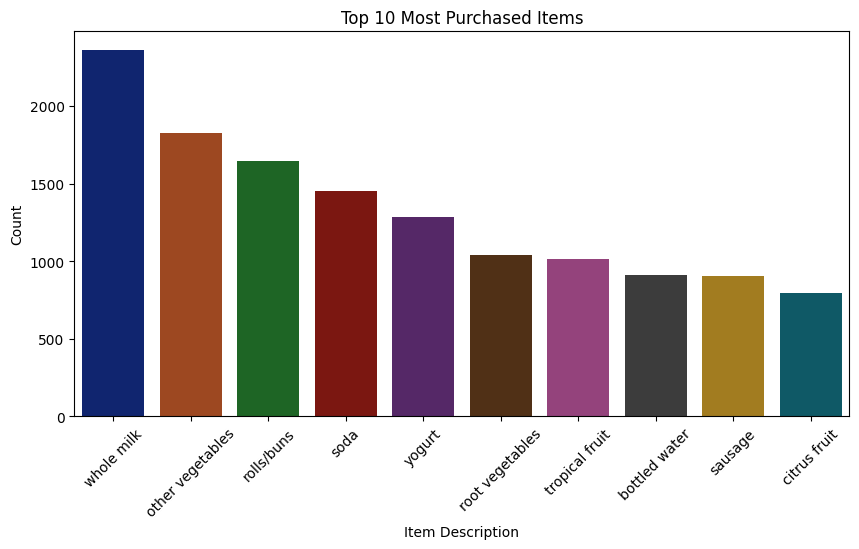

In [ ]:
#DISPLAY THE TOP 10 MOST PURCHASED ITEMS
top_items = groceries_df['itemDescription'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_items.index, y=top_items.values, hue=top_items.index, palette="dark", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Item Description")
plt.ylabel("Count")
plt.title("Top 10 Most Purchased Items")
plt.show()


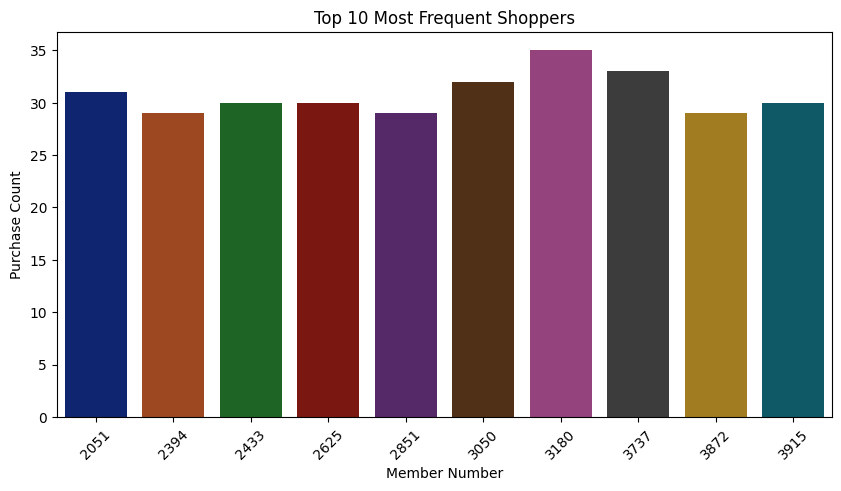

In [ ]:
#DISPLAY THE TOP 10 MOST FREQUENT SHOPPERS
top_members = groceries_df['Member_number'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_members.index, y=top_members.values, hue=top_members.index, palette="dark", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Member Number")
plt.ylabel("Purchase Count")
plt.title("Top 10 Most Frequent Shoppers")
plt.show()


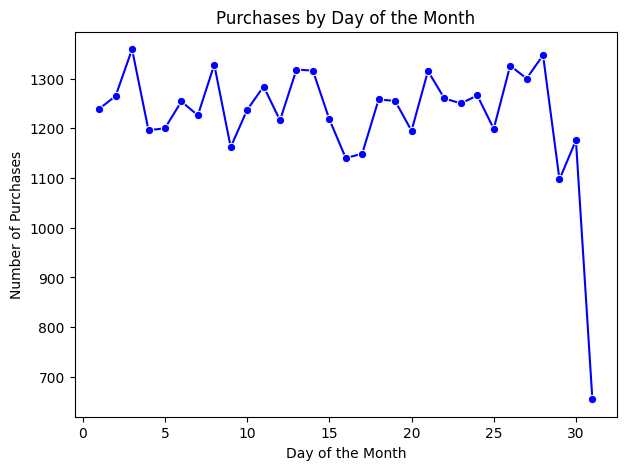

In [ ]:
#DISPLAY ALL DAY PURCHASES
day_counts = groceries_df["Day"].value_counts().sort_index()
plt.figure(figsize=(7,5))
sns.lineplot(x=day_counts.index, y=day_counts.values, marker="o", color="b")
plt.xlabel("Day of the Month")
plt.ylabel("Number of Purchases")
plt.title("Purchases by Day of the Month")
plt.show()

C:\Users\arune\AppData\Local\Temp\ipykernel_10212\215337944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="pink")


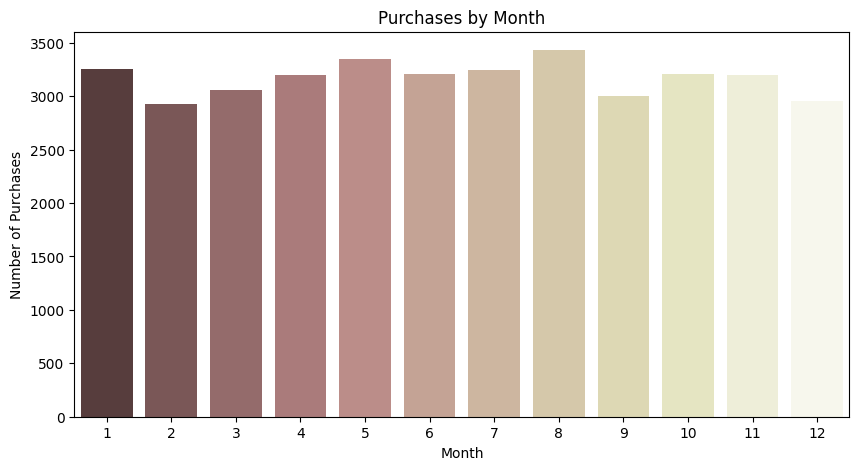

In [ ]:
#DISPLAY ALL MONTH WITH PURCHASES COUNT
month_counts = groceries_df["Month"].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="pink")
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.title("Purchases by Month")
plt.show()

In [ ]:
#GROUPING THE COLUMNS FOR CONCAT THE TRANSACTION
Transaction_data = groceries_df.groupby(["Member_number", "Date"])["itemDescription"].apply(list).reset_index()

In [ ]:
#DISPLAY THE GROUPED DF
Transaction_data.head()

,Member_number,Date,itemDescription
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"


In [ ]:
#IMPORTING THE ENCODER FOR CONVERT CATEGORICAL DATA TO NUMERIC
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
#DONE THE ENCODING
te = TransactionEncoder()
te_ary = te.fit(Transaction_data["itemDescription"]).transform(Transaction_data["itemDescription"])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
#CONVERT THE BOOLEAN TO INT
df_encoded = df_encoded.astype(int)

In [ ]:
#DISPLAY THE CONVERTED DF
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#IMPORT LIB FOR TRAIN THE MODEL
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [ ]:
#TRAIN THE APRIORI MODEL
frequent_itemsets = apriori(df_encoded, min_support=0.003, use_colnames=True)

C:\Users\arune\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#PRINT THE MOST FREQUENT MODEL WHICH HAS APPEARED MORE THAN 0.003
print(f"✅ Number of Frequent Itemsets: {len(frequent_itemsets)}")
print(frequent_itemsets.head())

✅ Number of Frequent Itemsets: 216
    support                 itemsets
0  0.004010  (Instant food products)
1  0.021386               (UHT-milk)
2  0.008087          (baking powder)
3  0.033950                   (beef)
4  0.021787                (berries)


In [ ]:
#GENERATE THE RULES
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print(f"✅ Number of Rules Generated: {len(rules)}")
rules.head()

✅ Number of Rules Generated: 39


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.033950,0.157923,0.004678,0.137795,0.872548,1.0,-0.000683,0.976656,-0.131343,0.024991,-0.023902,0.083709
1,(bottled beer),(other vegetables),0.045312,0.122101,0.004678,0.103245,0.845568,1.0,-0.000854,0.978973,-0.160585,0.028747,-0.021479,0.070780
2,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,1.0,-0.000005,0.999874,-0.000702,0.036469,-0.000126,0.101549
3,(bottled water),(whole milk),0.060683,0.157923,0.007151,0.117841,0.746196,1.0,-0.002432,0.954564,-0.265842,0.033818,-0.047598,0.081561
4,(brown bread),(whole milk),0.037626,0.157923,0.004478,0.119005,0.753566,1.0,-0.001464,0.955825,-0.253625,0.023435,-0.046216,0.073680


C:\Users\arune\AppData\Local\Temp\ipykernel_10212\4281142830.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strong_rules['lift'], y=strong_rules['antecedents'].astype(str), palette="magma")


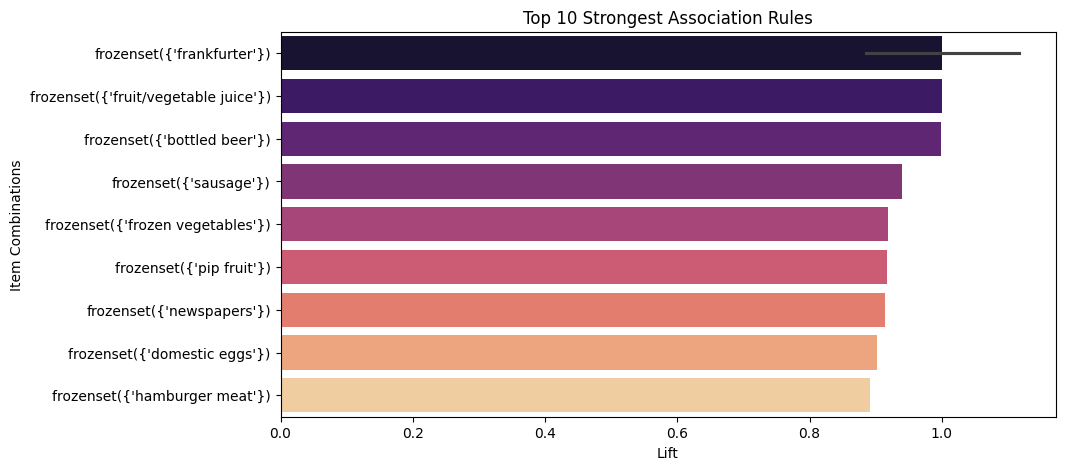

In [ ]:
#DISPLAY THE STRONG RULES OF TOP 10 FOR APROIRI
strong_rules = rules.sort_values(by="lift", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=strong_rules['lift'], y=strong_rules['antecedents'].astype(str), palette="magma")
plt.xlabel("Lift")
plt.ylabel("Item Combinations")
plt.title("Top 10 Strongest Association Rules")
plt.show()

In [ ]:
#PREPARE DATA FOR FP GROWTH MODEL
transactions = groceries_df.groupby("Member_number")["itemDescription"].apply(list)

In [ ]:
#CONVERT THE DATA IN BASKET FORMAT
unique_items = set(groceries_df["itemDescription"])
basket = pd.DataFrame([{item: (item in transaction) for item in unique_items} for transaction in transactions])

In [ ]:
#TRAIN THE DATA WITH FP GROWTH 
frequent_itemsets_fp = fpgrowth(basket, min_support=0.01, use_colnames=True)

In [ ]:
#GENERATE THE RULES FOR FP GROWTH 
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1.0)

In [ ]:
#DISPLAY THE RULES
rules_fp.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,1.0,0.007465,1.024310,0.091184,0.243489,0.023733,0.405892
1,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,1.0,0.007465,1.045971,0.071966,0.243489,0.043950,0.405892
2,(soda),(rolls/buns),0.313494,0.349666,0.119805,0.382160,1.092928,1.0,0.010187,1.052593,0.123855,0.220491,0.049965,0.362393
3,(rolls/buns),(soda),0.349666,0.313494,0.119805,0.342627,1.092928,1.0,0.010187,1.044316,0.130743,0.220491,0.042436,0.362393
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,1.0,0.006103,1.032237,0.071601,0.219402,0.031230,0.362886


C:\Users\arune\AppData\Local\Temp\ipykernel_10212\238626684.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strong_fp_rules['lift'], y=strong_fp_rules['antecedents'].astype(str), palette="magma")


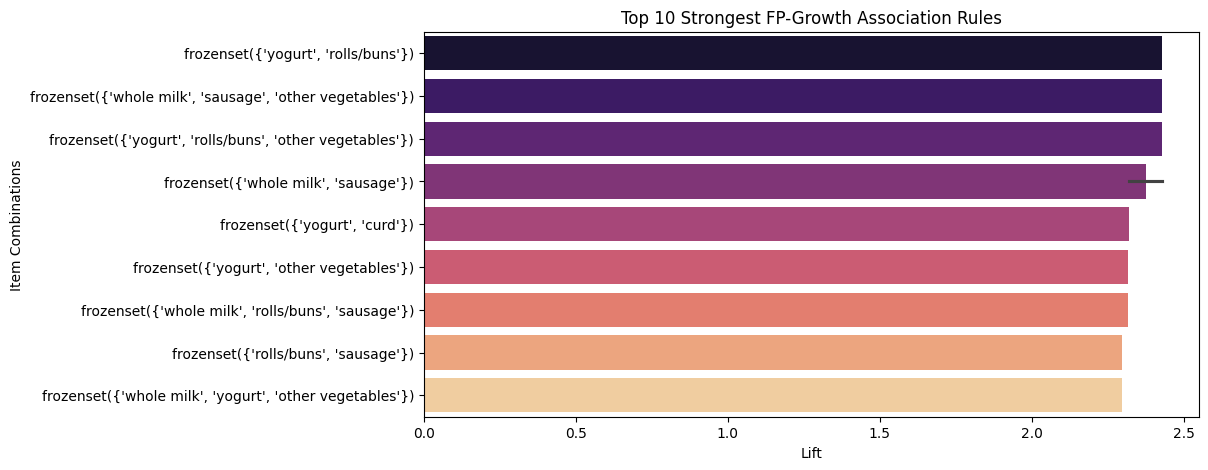

In [ ]:
#DISPLAY THE STRONG RULES OF TOP 10 FOR FP GROWTH
strong_fp_rules = rules_fp.sort_values(by="lift", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=strong_fp_rules['lift'], y=strong_fp_rules['antecedents'].astype(str), palette="magma")
plt.xlabel("Lift")
plt.ylabel("Item Combinations")
plt.title("Top 10 Strongest FP-Growth Association Rules")
plt.show()

In [ ]:
#IMPORT JOBLIB TO SAVE THE MODEL
import joblib

In [40]:
# Saving FP-Growth Model and Rules
joblib.dump(frequent_itemsets_fp, r"D:\MARKET BASKET ANALYSIS\fp model.pkl")

['D:\\MARKET BASKET ANALYSIS\\fp model.pkl']

In [42]:
joblib.dump(rules_fp,r"D:\MARKET BASKET ANALYSIS\fp rules.pkl")

['D:\\MARKET BASKET ANALYSIS\\fp rules.pkl']